In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Audio
from matplotlib.patches import Arrow
import time
plt.style.use('/Users/tjwilli/jupyter.mplstyle')

### Simple bouncing ball

Animation took 67.26 seconds to render


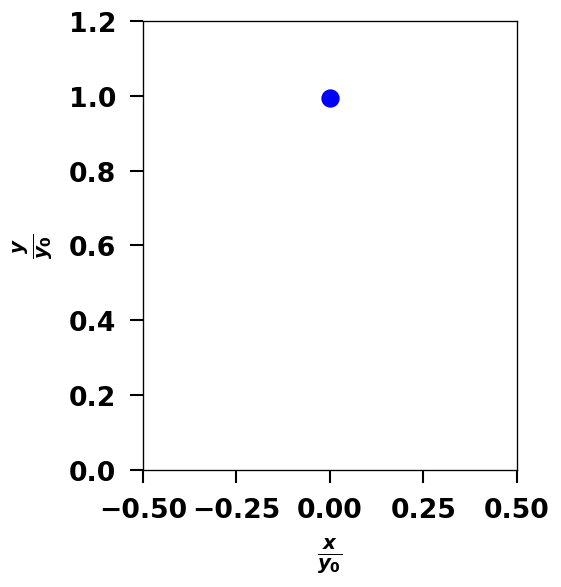

In [19]:
fname = 'one_ball_simple.mp4'


tstart = time.time()
def get_motion(tstop=10,dt=0.01):
    t = np.arange(0,tstop * np.sqrt( 2 ) ,dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    y[0] = 1
    
    for i in range(1,t.size):
        v[i] = v[i-1] - dt
        y[i] = y[i-1] + v[i] * dt
        if y[i] <= 0:
            v[i] = -v[i-1]
            y[i] = y[i-1] + v[i] * dt
    return t,v,y

t,v,y = get_motion()

fig = plt.figure( figsize=(8,5) )


ball = plt.scatter( [],[],s=100,c='blue' )
plt.xlim(-.5,.5)
plt.ylim(0,1.2)
plt.xlabel(r'$\frac{x}{y_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')
plt.tight_layout()


def init():
    ball.set_offsets( np.array( [[],[]]).T )
    
    return ball,

def animate(i):
    ball.set_offsets( np.array([ [0],[y[i]] ]).T )
    return ball,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=5, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

Animation took 102.64 seconds to render


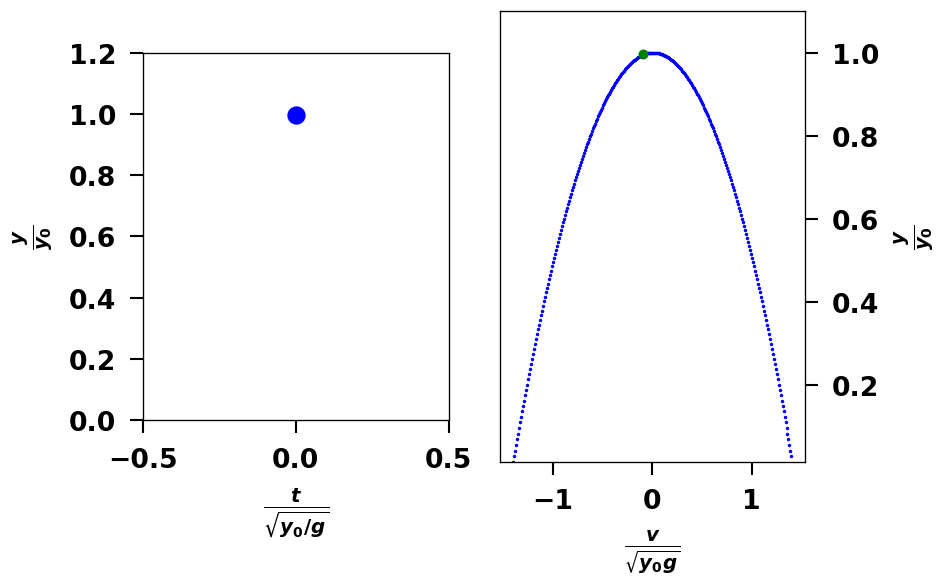

In [15]:
fname = 'one_ball_phase.mp4'


tstart = time.time()
def get_motion(tstop=10,dt=0.01):
    t = np.arange(0,tstop * np.sqrt( 2 ) ,dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    y[0] = 1
    
    for i in range(1,t.size):
        v[i] = v[i-1] - dt
        y[i] = y[i-1] + v[i] * dt
        if y[i] <= 0:
            v[i] = -v[i-1]
            y[i] = y[i-1] + v[i] * dt
    return t,v,y

t,v,y = get_motion()

fig = plt.figure( figsize=(8,5) )

#First plot
plt.subplot(1,2,1)
ball = plt.scatter( [],[],s=100,c='blue' )
plt.xlim(-.5,.5)
plt.ylim(0,1.2)
plt.xlabel(r'$\frac{t}{\sqrt{y_0/g}}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')


plt.subplot(1,2,2)
phase = plt.scatter( [],[],s=1,c='blue',alpha=.4 )
phase_head = plt.scatter( [],[],c='green' )
plt.xlim( v.min()*1.1, v.max()*1.1 )
plt.ylim( y.min()*1.1, y.max()*1.1 )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel( r'$\frac{v}{\sqrt{y_0g}}$' )
plt.ylabel( r'$\frac{y}{y_0}$')
plt.tight_layout()

def init():
    ball.set_offsets( np.array( [[],[]]).T )
    phase.set_offsets( np.array( [[],[]]).T )
    phase_head.set_offsets( np.array( [[],[]]).T )    
    return ball,

def animate(i):
    ball.set_offsets( np.array([ [0],[y[i]] ]).T )
    phase.set_offsets( np.array( [v[:i],y[:i]] ).T )
    phase_head.set_offsets( np.array([ [v[i]],[y[i]] ]).T )
    return ball,phase,phase_head

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=15, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

Animation took 105.57 seconds to render


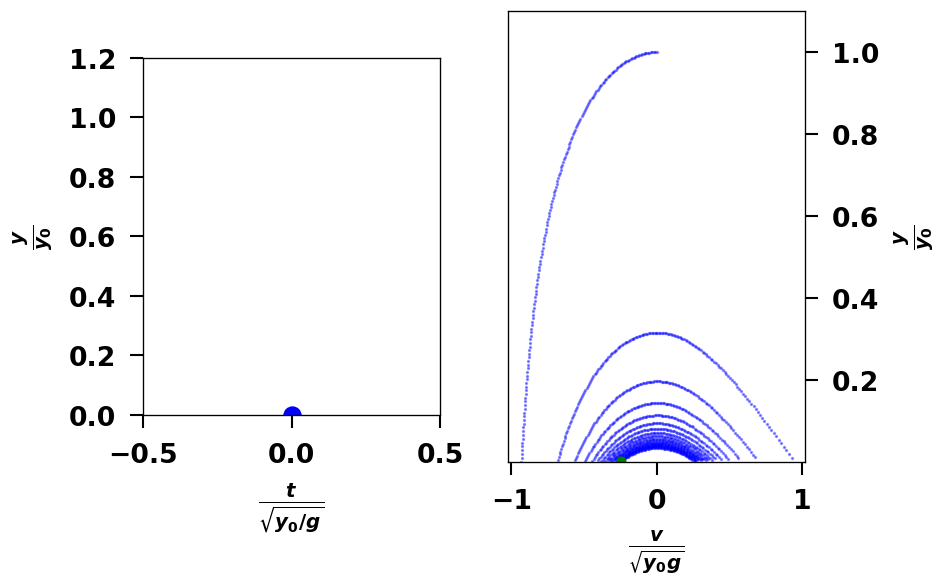

In [3]:
fname = 'one_ball_phase_damped.mp4'


tstart = time.time()
def get_motion_damp(tstop=10,dt=0.01):
    t = np.arange(0,tstop * np.sqrt( 2 ) ,dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    y[0] = 1
    
    for i in range(1,t.size):
        v[i] = v[i-1] - dt - 1* np.abs( v[i-1] ) * v[i-1] * dt
        y[i] = y[i-1] + v[i] * dt
        if y[i] <= 0:
            v[i] = -v[i-1]
            y[i] = y[i-1] + v[i] * dt
    return t,v,y

t,v,y = get_motion_damp()

fig = plt.figure( figsize=(8,5) )

#First plot
plt.subplot(1,2,1)
ball = plt.scatter( [],[],s=100,c='blue' )
plt.xlim(-.5,.5)
plt.ylim(0,1.2)
plt.xlabel(r'$\frac{t}{\sqrt{y_0/g}}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')


plt.subplot(1,2,2)
phase = plt.scatter( [],[],s=1,c='blue',alpha=.4 )
phase_head = plt.scatter( [],[],c='green' )
plt.xlim( v.min()*1.1, v.max()*1.1 )
plt.ylim( y.min()*1.1, y.max()*1.1 )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel( r'$\frac{v}{\sqrt{y_0g}}$' )
plt.ylabel( r'$\frac{y}{y_0}$')
plt.tight_layout()

def init():
    ball.set_offsets( np.array( [[],[]]).T )
    phase.set_offsets( np.array( [[],[]]).T )
    phase_head.set_offsets( np.array( [[],[]]).T )    
    return ball,

def animate(i):
    ball.set_offsets( np.array([ [0],[y[i]] ]).T )
    phase.set_offsets( np.array( [v[:i],y[:i]] ).T )
    phase_head.set_offsets( np.array([ [v[i]],[y[i]] ]).T )
    return ball,phase,phase_head

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=15, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

### Two balls simple

In [33]:
def collision(v10,v20,r,debug=False):
    v11 = ( (1-r)*v10 + 2*r*v20 ) / ( 1+r )
    v21 = ( 2 * v10 + (r-1)*v20 ) / ( 1+r )
    if debug:
        E0 = v10**2 + r * v20**2
        E1 = v11**2 + r * v21**2
        p0 = v10 + r * v20
        p1 = v11 + r * v21
        
        assert( np.abs(E1-E0) <= 1e-10 )
        assert( np.abs(p1-p0) <= 1e-10)
    return v11,v21


def get_energy(v1,v2,y1,y2,r):
    return ( 0.5*v1**2 + 0.5*v2**2 * r + y1 + r * y2 ) / ( 1+r ) 

def get_motion2(r=0.5,tstop=10,dt=0.01,radius=0.01,y0=[.5,1],debug=True ):
    t = np.arange(0,tstop*np.sqrt(2),dt)
    v1 = np.zeros_like( t )
    y1 = np.zeros_like( t )
    v2 = np.zeros_like( t )
    y2 = np.zeros_like( t )
    
    iponc = []
    vponc = []
    yponc = []
    y1[0] = y0[0]
    y2[0] = y0[1]
    
    for i in range(1,t.size):
        if debug:eng = get_energy(v1[i-1],v2[i-1],y1[i-1],y2[i-1],r)
        if debug:print( "y1\ty2\tv1\tv2\tE (i={})".format(i) )
        if debug:print( "{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i-1],y2[i-1],v1[i-1],v2[i-1],eng) )
        v1[i] = v1[i-1] - dt
        y1[i] = y1[i-1] + v1[i] * dt
        
        v2[i] = v2[i-1] - dt
        y2[i] = y2[i-1] + v2[i] * dt
        
        wall = False
        #If lower ball collides with wall
        if (y1[i] <= radius) and (v1[i] < 0):
            iponc.append( i )
            vponc.append( v2[i] )
            yponc.append( y2[i] )
            wall = True
            if debug:print( "\tWall collision" )
            if debug:print( "\t{:.4f}\t{:.4f}".format(y1[i],v1[i]) )
            v1[i] = -v1[i-1]
            y1[i] = y1[i-1] + v1[i] * dt
            if debug:print( "\t{:.4f}\t{:.4f}".format(y1[i],v1[i]) )
            
        if y2[i] - y1[i] <= radius:
            if debug:print( "\tBall collision" )
            if debug:print( "\ty1\ty2\tv1\tv2\tE (i={})".format(i) )
            if debug:print( "\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i],y2[i],v1[i],v2[i],eng) )
            v1i = v1[i-1]
            v2i = v2[i-1]
            if wall:
                v1i = v1[i]
            v11,v21 = collision(v1i,v2i,r,debug=debug)
            v1[i] = v11
            v2[i] = v21
            y1[i] = y1[i-1] + v1[i] * dt
            y2[i] = y2[i-1] + v2[i] * dt
            if debug:print( "\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t".format(y1[i],y2[i],v1[i],v2[i],eng) )
        
    return t,v1,v2,y1,y2,vponc,yponc,iponc

Animation took 118.27 seconds to render


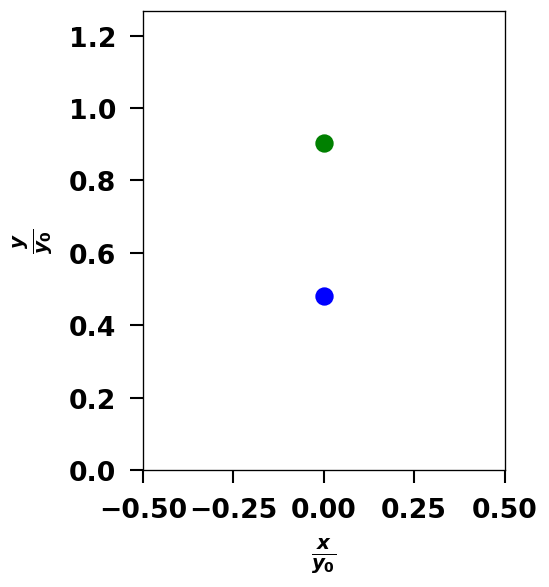

In [28]:
fname = 'two_balls_r_2.mp4'

tstart = time.time()

r = 2
radius = 0.05
t,v1,v2,y1,y2 = get_motion2(r=r,radius=radius,debug=0,tstop=20)
fig = plt.figure( figsize=(8,5) )


ball1 = plt.scatter( [],[],s=100,c='blue' )
ball2 = plt.scatter( [],[],s=100,c='green' )
plt.xlim(-.5,.5)
plt.ylim(0,y2.max()*1.1)
plt.xlabel(r'$\frac{x}{y_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')
plt.tight_layout()


def init():
    ball1.set_offsets( np.array( [[],[]]).T )
    ball2.set_offsets( np.array( [[],[]]).T )
    return ball1,ball2

def animate(i):
    ball1.set_offsets( np.array([ [0],[y1[i]] ]).T )
    ball2.set_offsets( np.array([ [0],[y2[i]] ]).T )
    return ball1,ball2

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=5, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

Animation took 203.28 seconds to render


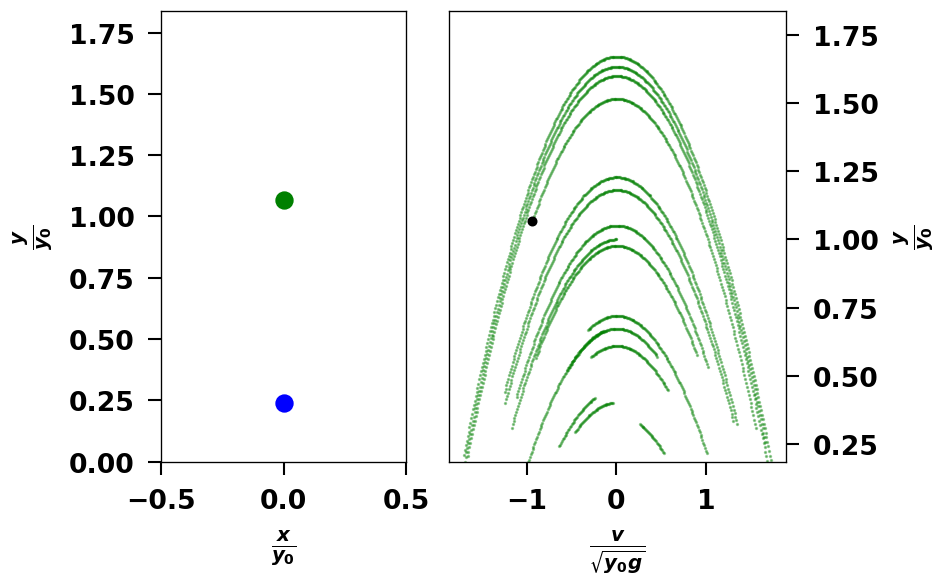

In [31]:
fname = 'two_balls_r_05_phase.mp4'

tstart = time.time()

r = 0.5
radius = 0.05
t,v1,v2,y1,y2 = get_motion2(r=r,radius=radius,debug=0,tstop=20)
fig = plt.figure( figsize=(8,5) )

plt.subplot(1,2,1)
ball1 = plt.scatter( [],[],s=100,c='blue' )
ball2 = plt.scatter( [],[],s=100,c='green' )
plt.xlim(-.5,.5)
plt.ylim(0,y2.max()*1.1)
plt.xlabel(r'$\frac{x}{y_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')

plt.subplot(1,2,2)
phase = plt.scatter( [],[],s=1,c='green',alpha=.4 )
phase_head = plt.scatter( [],[],c='k' )
plt.xlim( v2.min()*1.1, v2.max()*1.1 )
plt.ylim( y2.min()*1.1, y2.max()*1.1 )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel( r'$\frac{v}{\sqrt{y_0g}}$' )
plt.ylabel( r'$\frac{y}{y_0}$')
plt.tight_layout()


def init():
    ball1.set_offsets( np.array( [[],[]]).T )
    ball2.set_offsets( np.array( [[],[]]).T )
    phase.set_offsets( np.array( [[],[]]).T )
    phase_head.set_offsets( np.array( [[],[]]).T )
    
    return ball1,ball2

def animate(i):
    ball1.set_offsets( np.array([ [0],[y1[i]] ]).T )
    ball2.set_offsets( np.array([ [0],[y2[i]] ]).T )
    phase.set_offsets( np.array( [v2[:i],y2[:i]] ).T )
    phase_head.set_offsets( np.array([ [v2[i]],[y2[i]] ]).T )
    return ball,phase,phase_head
    return ball1,ball2

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=5, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

### Poincare

Animation took 271.10 seconds to render


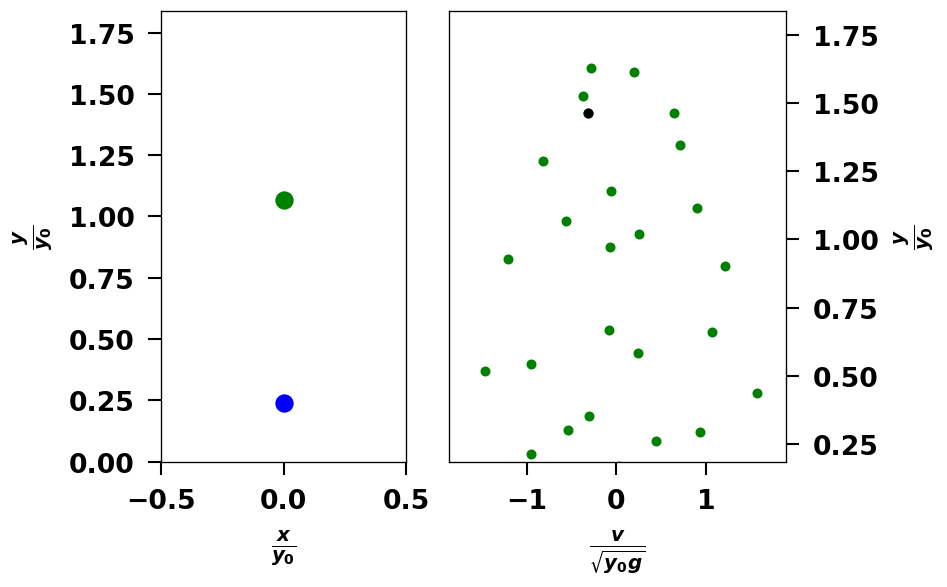

In [94]:
fname = 'two_balls_r_05_poinc.mp4'

tstart = time.time()

r = 0.5
radius = 0.05
t,v1,v2,y1,y2,vponc,yponc,iponc = get_motion2(r=r,radius=radius,debug=0,tstop=20)
fig = plt.figure( figsize=(8,5) )

plt.subplot(1,2,1)
ball1 = plt.scatter( [],[],s=100,c='blue' )
ball2 = plt.scatter( [],[],s=100,c='green' )
plt.xlim(-.5,.5)
plt.ylim(0,y2.max()*1.1)
plt.xlabel(r'$\frac{x}{y_0}$')
plt.ylabel(r'$\frac{y}{y_0}$')
plt.gca().set_aspect('equal')

plt.subplot(1,2,2)
phase = plt.scatter( [],[],c='green',alpha=1 )
phase_head = plt.scatter( [],[],c='k' )
plt.xlim( v2.min()*1.1, v2.max()*1.1 )
plt.ylim( y2.min()*1.1, y2.max()*1.1 )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel( r'$\frac{v}{\sqrt{y_0g}}$' )
plt.ylabel( r'$\frac{y}{y_0}$')
plt.tight_layout()


def init():
    ball1.set_offsets( np.array( [[],[]]).T )
    ball2.set_offsets( np.array( [[],[]]).T )
    phase.set_offsets( np.array( [[],[]]).T )
    phase_head.set_offsets( np.array( [[],[]]).T )
    
    return ball1,ball2

def animate(i):
    ball1.set_offsets( np.array([ [0],[y1[i]] ]).T )
    ball2.set_offsets( np.array([ [0],[y2[i]] ]).T )
    if i in iponc:
        ind = iponc.index( i ) + 1
        phase.set_offsets( np.array( [vponc[:ind],yponc[:ind]] ).T )
        phase_head.set_offsets( np.array([ [vponc[:ind][-1]],[yponc[:ind][-1] ] ] ).T )
    return ball1,ball2,phase,phase_head

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=25, blit=True)

anim.save(fname)

tstop = time.time()

print( "Animation took {:.2f} seconds to render".format(tstop-tstart))

Audio( "buzzer3_x.wav",autoplay=True)

In [92]:
274/60

4.566666666666666